In [94]:
import pandas as pd

In [95]:

# from datasets import load_dataset
# dataset = load_dataset("Fsoft-AIC/the-vault-function", split="validation")


In [96]:
import glob

parquet_files = glob.glob("/media/mateusz/DATA/downloads/jb-rag/*.parquet")

# Wczytanie i połączenie wszystkich plików Parquet
df_list = [pd.read_parquet(file) for file in parquet_files]
df = pd.concat(df_list, ignore_index=True)


In [97]:
df.head()

,hexsha,repo,path,license,language,identifier,return_type,original_string,original_docstring,docstring,docstring_tokens,code,code_tokens,short_docstring,short_docstring_tokens,comment,parameters,docstring_params
0,a27d82324af915d1be3e134e9b39c8ab4b301582,o-ran-sc/ric-plt-utils,mgxapp/lib/tools.c,"[Apache-2.0, CC-BY-4.0]",C,ensure_nxt_arg,void,"extern void ensure_nxt_arg( int max, int idx, ...",/*\n\tEnsure that there is a 'next' argument. ...,Ensure that there is a 'next' argument. Passin...,"[Ensure, that, there, is, a, ', next, ', argum...","extern void ensure_nxt_arg( int max, int idx, ...","[extern, void, ensure_nxt_arg, (, int, max, ,,...",Ensure that there is a 'next' argument.,"[Ensure, that, there, is, a, ', next, ', argum...",[],"[{'param': 'max', 'type': 'int'}, {'param': 'i...","{'returns': [], 'raises': [], 'params': [{'ide..."
1,a27d82324af915d1be3e134e9b39c8ab4b301582,o-ran-sc/ric-plt-utils,mgxapp/lib/tools.c,"[Apache-2.0, CC-BY-4.0]",C,json_add_string,char,"extern char* json_add_string( char* buf, int l...",/*\n\tThe next few function take a buffer with...,The next few function take a buffer with exist...,"[The, next, few, function, take, a, buffer, wi...","extern char* json_add_string( char* buf, int l...","[extern, char, *, json_add_string, (, char, *,...",The next few function take a buffer with exist...,"[The, next, few, function, take, a, buffer, wi...",[],"[{'param': 'buf', 'type': 'char'}, {'param': '...","{'returns': [], 'raises': [], 'params': [{'ide..."
2,a27d82324af915d1be3e134e9b39c8ab4b301582,o-ran-sc/ric-plt-utils,mgxapp/lib/tools.c,"[Apache-2.0, CC-BY-4.0]",C,mt_log_target,void,extern void mt_log_target( const char* file_na...,/*\n\tAllow caller to redirect human readable ...,Allow caller to redirect human readable output,"[Allow, caller, to, redirect, human, readable,...",extern void mt_log_target( const char* file_na...,"[extern, void, mt_log_target, (, const, char, ...",Allow caller to redirect human readable output,"[Allow, caller, to, redirect, human, readable,...",[],"[{'param': 'file_name', 'type': 'char'}]","{'returns': [], 'raises': [], 'params': [{'ide..."
3,a27d82324af915d1be3e134e9b39c8ab4b301582,o-ran-sc/ric-plt-utils,mgxapp/lib/tools.c,"[Apache-2.0, CC-BY-4.0]",C,mt_log_init,void,extern void mt_log_init( void ) {\n\tif( mt_lo...,/*\n\tInitialise things; automatically invoked...,Initialise things; automatically invoked if us...,"[Initialise, things, ;, automatically, invoked...",extern void mt_log_init( void ) {\n\tif( mt_lo...,"[extern, void, mt_log_init, (, void, ), {, if,...",Initialise things; automatically invoked if us...,"[Initialise, things, ;, automatically, invoked...",[],[],"{'returns': [], 'raises': [], 'params': [], 'o..."
4,a27d82324af915d1be3e134e9b39c8ab4b301582,o-ran-sc/ric-plt-utils,mgxapp/lib/tools.c,"[Apache-2.0, CC-BY-4.0]",C,mt_log_set_level,void,extern void mt_log_set_level( int new_level ) ...,/*\n\tSet the log level to the desired value.\n*/,Set the log level to the desired value.,"[Set, the, log, level, to, the, desired, value...",extern void mt_log_set_level( int new_level ) ...,"[extern, void, mt_log_set_level, (, int, new_l...",Set the log level to the desired value.,"[Set, the, log, level, to, the, desired, value...","[// mdc has no concept of a critical error, //...","[{'param': 'new_level', 'type': 'int'}]","{'returns': [], 'raises': [], 'params': [{'ide..."


In [98]:
df = df[["code", "docstring", "language", "path", "repo"]]

In [99]:
df["language"].value_counts()

language
Python        30992
C             27525
C#            24787
JavaScript    22044
PHP           21375
C++           20011
Ruby          17338
Rust          16716
Name: count, dtype: int64

In [100]:
grouped = df.groupby(["language", "repo"])


In [101]:
from collections import defaultdict, Counter
import random 

dataset = defaultdict(list)

for (language, repo), group in grouped:
    sampled_group = group.sample(n=min(len(group), 5), random_state=42)
    
    for _, row in sampled_group.iterrows():
        start_line = random.randint(1, 30)
        code_lines = row["code"].count("\n") + 1
        end_line = start_line + code_lines
        
        input_dict = {
            "relative_path": row["path"],
            "file_type": "code",
            "language": row["language"],
            "repo": row["repo"], 
            "code": row["code"],
            "start_line": start_line,
            "end_line": end_line,
        }
        output = row["docstring"]
        
        dataset[language].append({"input": input_dict, "output": output})


In [102]:
repos = []
for language, records in dataset.items():
    for record in records:
        try:
            repos.append(record["input"]["repo"])
        except TypeError:
            print(f"KeyError: {record}")



In [103]:
Counter(repos).values()

dict_values([5, 1, 1, 1, 5, 5, 1, 1, 3, 2, 3, 5, 5, 1, 1, 4, 5, 1, 5, 3, 5, 5, 1, 2, 3, 2, 5, 5, 5, 2, 5, 2, 5, 1, 5, 1, 1, 3, 3, 5, 1, 2, 5, 1, 5, 2, 1, 1, 5, 3, 2, 1, 5, 5, 4, 2, 1, 1, 2, 5, 5, 1, 1, 4, 1, 5, 5, 1, 5, 4, 5, 1, 1, 1, 1, 5, 3, 2, 3, 5, 2, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 5, 1, 1, 5, 1, 5, 4, 5, 4, 1, 1, 1, 1, 5, 5, 5, 5, 3, 3, 4, 3, 5, 1, 4, 5, 1, 1, 2, 5, 2, 1, 3, 5, 2, 1, 1, 5, 1, 5, 2, 1, 1, 5, 5, 3, 5, 5, 3, 3, 2, 1, 2, 5, 3, 5, 2, 5, 1, 1, 5, 2, 5, 5, 3, 2, 5, 5, 3, 5, 4, 2, 5, 5, 2, 4, 1, 1, 5, 1, 5, 3, 1, 3, 1, 3, 1, 5, 2, 1, 4, 1, 5, 2, 3, 5, 5, 2, 1, 1, 2, 5, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 1, 1, 3, 2, 1, 2, 1, 2, 6, 5, 1, 5, 5, 2, 1, 2, 3, 3, 1, 5, 5, 2, 5, 5, 5, 1, 5, 5, 3, 1, 5, 5, 2, 4, 1, 1, 4, 2, 3, 2, 2, 5, 3, 5, 5, 4, 5, 5, 5, 1, 5, 2, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 2, 1, 5, 5, 2, 3, 5, 1, 1, 5, 1, 2, 2, 5, 2, 5, 1, 2, 5, 5, 5, 1, 1, 1, 5, 5, 1, 5, 5, 3, 2, 2, 5, 1, 1, 5, 5, 1, 3, 1, 1, 5, 1, 1, 1, 5, 5, 5, 4, 5, 5, 5, 2, 1, 1, 5, 4, 5, 5, 3, 5, 2, 5, 

In [104]:
final_dataset = []
for language, records in dataset.items():
    repo_groups = defaultdict(list)
    for record in records:
        repo = record["input"]["repo"]
        repo_groups[repo].append(record)
    
    sampled_records = []
    for repo, repo_records in repo_groups.items():
        sampled_records.extend(repo_records)
        if len(sampled_records) > 600:
            break
    
    final_dataset.extend(sampled_records)

In [105]:
len(final_dataset)

4821

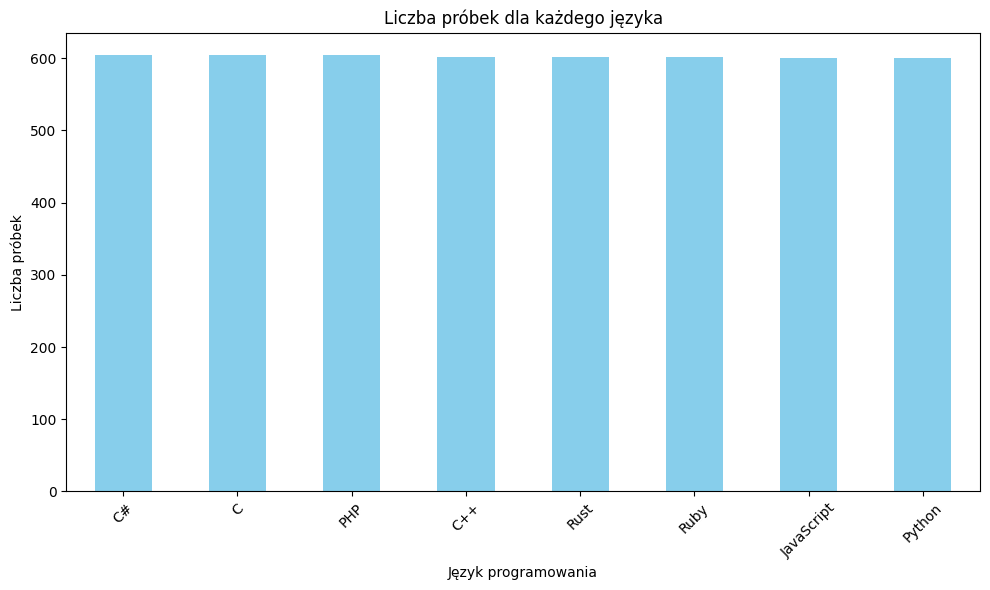

In [106]:
import matplotlib.pyplot as plt


df = pd.DataFrame([{
    "language": record["input"]["language"],
    "repo": record["input"]["repo"]
} for record in final_dataset])

language_counts = df["language"].value_counts()

plt.figure(figsize=(10, 6))
language_counts.plot(kind="bar", color="skyblue")
plt.title("Liczba próbek dla każdego języka")
plt.xlabel("Język programowania")
plt.ylabel("Liczba próbek")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
repo_counts = df["repo"].value_counts()
Counter(repo_counts)

Counter({5: 609, 1: 435, 2: 216, 3: 151, 4: 114})

In [109]:
for record in final_dataset:
    del record["input"]["repo"]

In [110]:
import json 

with open("../data/summary/processed/dataset.jsonl", "w", encoding="utf-8") as f:
    for item in final_dataset:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")